# Data Normalization

In [5]:
import torch
from torch import nn, optim
import torch.nn.functional as F

import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from IPython import display

In [6]:
print(torch.cuda.is_available())
print(torch.cuda.get_device_name())

True
GeForce GTX 1070


In [7]:
train_set = torchvision.datasets.FashionMNIST(
    root="./data",
    download=True,
    train=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw


Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw
Processing...
Done!


C:\Users\mehedi\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Easy way

In [9]:
loader = DataLoader(train_set, batch_size=len(train_set), num_workers=1)
data = next(iter(loader))
data[0].mean(), data[0].std()

(tensor(0.2861), tensor(0.3530))

## Hard way

In [11]:
loader = DataLoader(train_set, batch_size=1000, num_workers=1)
num_of_pixels = len(train_set)*28*28

total_sum = 0
for batch in loader: total_sum += batch[0].sum()

mean = total_sum / num_of_pixels

sum_of_squared_error = 0
for batch in loader: sum_of_squared_error += ((batch[0] - mean).pow(2)).sum()
std = torch.sqrt(sum_of_squared_error / num_of_pixels)

print("mean: {:.4f}    std{:.4f}".format(mean, std))

mean: 0.2860    std0.3530


## Plotting the values

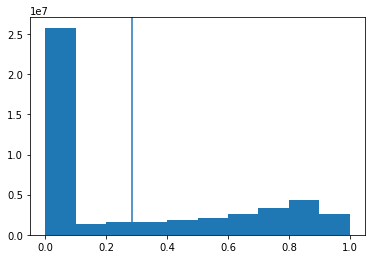

In [12]:
plt.hist(data[0].flatten())
plt.axvline(data[0].mean())

## Using `mean` and `std` values
### note we use same mean and std in training, testing, validation

In [13]:
train_set_normal = torchvision.datasets.FashionMNIST(
    root='./data',
    download=True,
    train=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
)

In [14]:
loader = DataLoader(train_set_normal, batch_size=len(train_set_normal), num_workers=1)
data = next(iter(loader))
data[0].mean(), data[0].std()

(tensor(-5.0153e-06), tensor(1.0000))

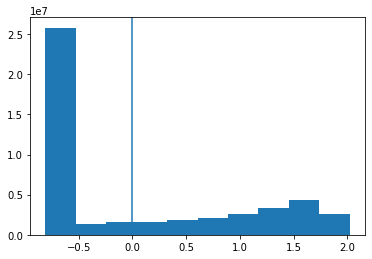

In [15]:
plt.hist(data[0].flatten())
plt.axvline(data[0].mean())

In [16]:
train_sets = {
    "not_normal": train_set,
    "normal": train_set_normal
}

In [20]:
from collections import OrderedDict, namedtuple
from itertools import product

class RunBuilder():
    @staticmethod
    def get_runs(params):
        Run = namedtuple('Run', params.keys())
        runs = []
        
        for v in product(*params.values()):
            runs.append(Run(*v))
        
        return runs
